In [1]:
import numpy as np
import seaborn as sns


Отключение вывода предупреждений

In [2]:
import warnings
warnings.filterwarnings('ignore')

Настройка красивого окна вывода графиков

In [3]:
import matplotlib as mlp

mlp.rcParams['lines.linewidth'] = 5

mlp.rcParams['xtick.major.size'] = 14
mlp.rcParams['xtick.major.width'] = 5
mlp.rcParams['xtick.labelsize'] = 12
mlp.rcParams['xtick.color'] = 'black'

mlp.rcParams['ytick.major.size'] = 14
mlp.rcParams['ytick.major.width'] = 5
mlp.rcParams['ytick.labelsize'] = 12
mlp.rcParams['ytick.color'] = 'black'

mlp.rcParams['axes.labelsize'] = 14
mlp.rcParams['axes.titlesize'] = 14
mlp.rcParams['axes.titlecolor'] = 'black'
mlp.rcParams['axes.labelcolor'] = 'black'

Описание данных:
- REF - Идентификатор ссылки
- Company (Manufacturer) - Наименование производителя
- Company Location - Местоположение компании
- Review Date - Дата рассмотрения (год)
- Country of Bean Origin - Страна происхождения бобов
- Specific Bean Origin or Bar Name - Конкретное происхождение зерна или название батончика
- Cocoa Percent - Процентное содержание какао-продуктов
- Ingredients - Ингредиенты
- Most Memorable Characteristics - Самые запоминающиеся характеристики
- Rating - Рейтинг

In [85]:
# Импорт библиотеки для работы с табличнми данными pandas
import pandas as pd

# Создание датафрема из табличных данных
df = pd.read_csv('cacao.csv', encoding='windows-1252')

# Вывод пяти первых строк датафрейма
df.head()

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
0,2542,5150,U.S.A.,2021,India,"Anamalai, batch 1",68%,"3- B,S,C","milk brownie, macadamia,chewy",3.50
1,2546,5150,U.S.A.,2021,Uganda,"Semuliki Forest, batch 1",80%,"3- B,S,C","mildly bitter, basic cocoa, fatty",3.25
2,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68%,"3- B,S,C","chewy, off, rubbery",3.00
3,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72%,"3- B,S,C","fatty, earthy, moss, nutty,chalky",3.00
4,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76%,"3- B,S,C","cocoa, blackberry, full body",3.75


In [86]:
# Описание данных (количество данных и их объем)
df.shape

(2693, 10)

In [87]:
# Список данных, с указанием типа данных и количеством не пустых значений
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2693 entries, 0 to 2692
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   REF                               2693 non-null   int64  
 1   Company (Manufacturer)            2693 non-null   object 
 2   Company Location                  2693 non-null   object 
 3   Review Date                       2693 non-null   int64  
 4   Country of Bean Origin            2693 non-null   object 
 5   Specific Bean Origin or Bar Name  2693 non-null   object 
 6   Cocoa Percent                     2693 non-null   object 
 7   Ingredients                       2693 non-null   object 
 8   Most Memorable Characteristics    2693 non-null   object 
 9   Rating                            2693 non-null   float64
dtypes: float64(1), int64(2), object(7)
memory usage: 210.5+ KB


In [8]:
# Вывод статистики для числовых столбцов
df.describe()

,REF,Review Date,Rating
count,2693.000000,2693.000000,2693.000000
mean,1514.082807,2014.871147,3.197828
std,804.025376,4.304197,0.440790
min,5.000000,2006.000000,1.000000
25%,849.000000,2012.000000,3.000000
50%,1526.000000,2015.000000,3.250000
75%,2202.000000,2018.000000,3.500000
max,2876.000000,2023.000000,4.000000


In [40]:
# Вывод статистики для категориальных столбцов
df.describe(include='object').T

,count,unique,top,freq
Company (Manufacturer),2693,616,Soma,57
Company Location,2693,68,U.S.A.,1227
Country of Bean Origin,2693,64,Peru,265
Specific Bean Origin or Bar Name,2693,1720,Madagascar,56
Ingredients,2693,22,"3-B,S,C",1100
Most Memorable Characteristics,2693,2650,"creamy, nutty, cocoa",4


In [9]:
# Преобразование Cocoa Percent к числовому типу
df['Cocoa Percent'] = df['Cocoa Percent'].apply(lambda x: x[:-1]).astype('float')
df['Cocoa Percent'].dtypes

dtype('float64')

In [10]:
# Определение количества пустых значений в данных по столцам
df.isna().sum()

REF                                 0
Company (Manufacturer)              0
Company Location                    0
Review Date                         0
Country of Bean Origin              0
Specific Bean Origin or Bar Name    0
Cocoa Percent                       0
Ingredients                         0
Most Memorable Characteristics      0
Rating                              0
dtype: int64

In [11]:
# Проверка, есть ли строки с 0-длиной
for col in df.columns:
    print(col, df[col].apply(lambda x: 1 if len(str(x)) == 0 else 0).sum())

REF 0
Company (Manufacturer) 0
Company Location 0
Review Date 0
Country of Bean Origin 0
Specific Bean Origin or Bar Name 0
Cocoa Percent 0
Ingredients 87
Most Memorable Characteristics 0
Rating 0


In [12]:
# Уникальные значения столбцы Ingredients, для контроля над пустыми строками
df['Ingredients'].unique()

array(['3-B,S,C', '2-B,S', '3-B,S,L', '4-B,S,C,L', '4-B,S,C,V',
       '6-B,S,C,V,L,Sa', '5-B,S,C,V,Sa', '5-B,S,C,V,L', '', '4-B,S,V,L',
       '2-B,S*', '1-B', '3-B,S*,C', '3-B,S,V', '4-B,S*,C,L', '4-B,S,C,Sa',
       '3-B,S*,Sa', '4-B,S*,C,Sa', '4-B,S*,V,L', '2-B,C', '4-B,S*,C,V',
       '5-B,S,C,L,Sa'], dtype=object)

In [13]:
# Заполним пропущенные данные значение неизвестно (unknown)
df['Ingredients'] = df['Ingredients'].apply(lambda x: 'unknown' if len(str(x)) == 0 else x)

In [11]:
# Проверка наличия задублированных данных
df.duplicated().sum()

0

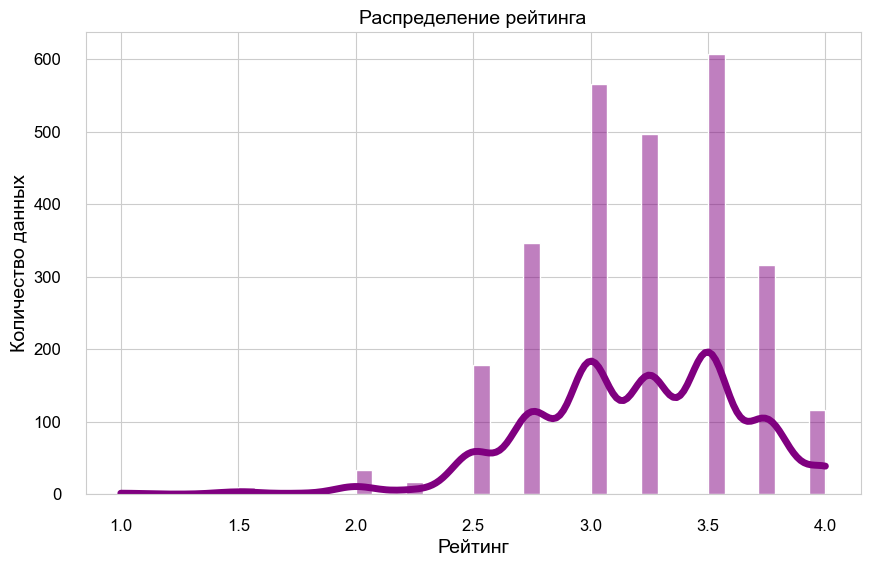

In [14]:
# Импорт билиотеки для построения графиков
from matplotlib import pyplot as plt

# Построение гистограммы - распределение данных по рейтингу
fig = plt.figure()
fig.set_size_inches(10, 6)
sns.histplot(df['Rating'], kde=True, color='purple')
plt.title('Распределение рейтинга')
plt.xlabel('Рейтинг')
plt.ylabel('Количество данных')
fig.savefig('Rating_Distribution.png')
plt.show()

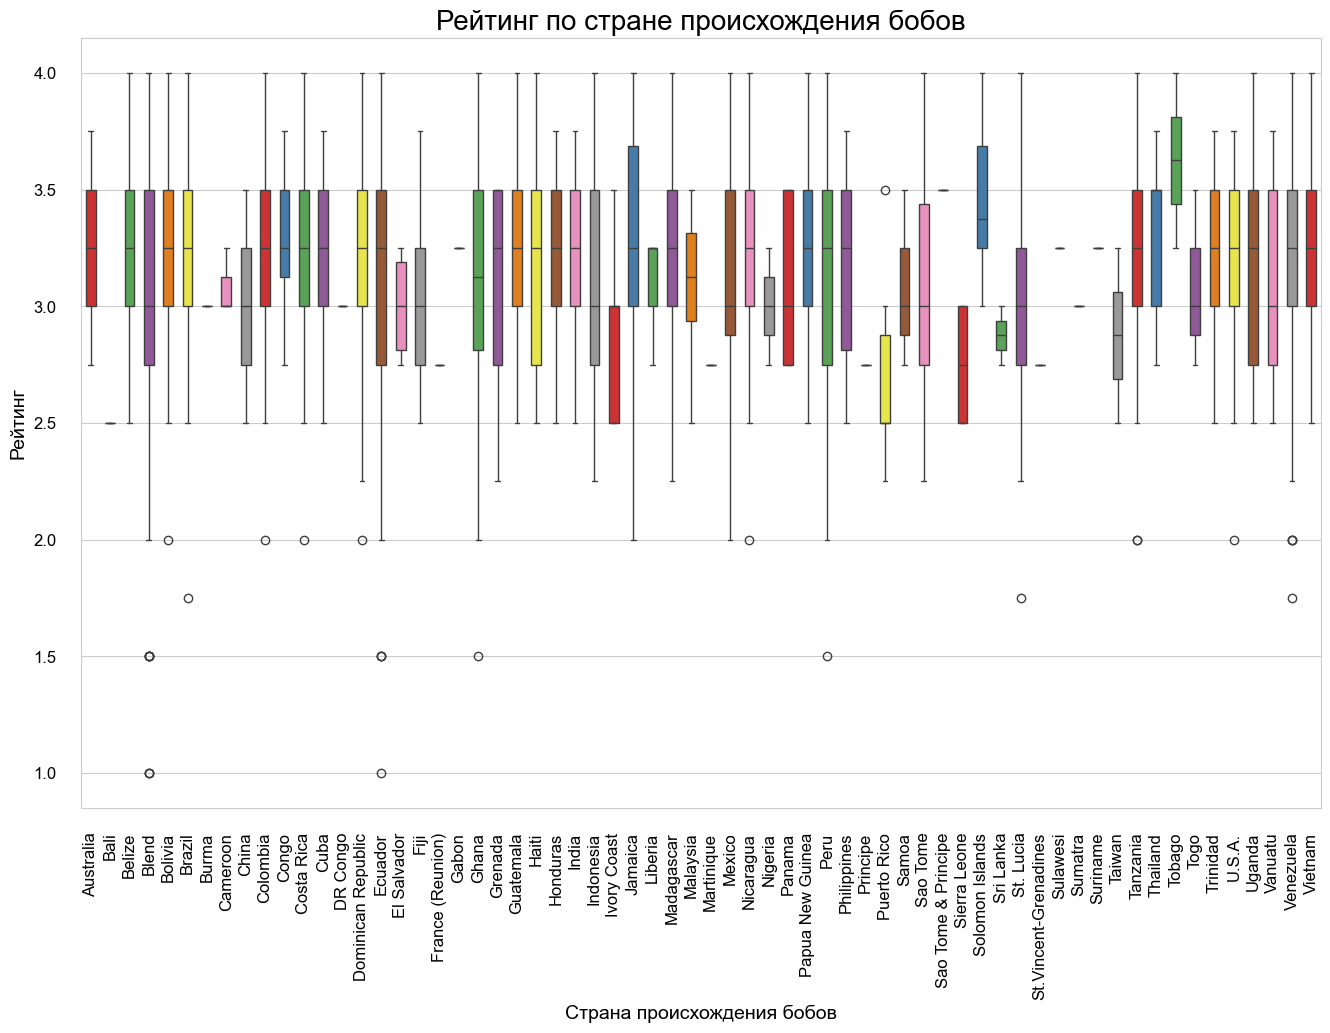

In [15]:
# Рейтинг по стране произростания какао-бабо

fig = plt.figure()
fig.set_size_inches(16, 10)
    
sns.boxplot(y='Rating', x=df['Country of Bean Origin'].astype('category'), data=df, palette='Set1', width=.5)
plt.title('Рейтинг по стране происхождения бобов', fontsize=20)
plt.xticks(rotation=90)
plt.xlabel('Страна происхождения бобов')
plt.ylabel('Рейтинг')
fig.savefig('Rating_vs_Country_of_Bean_Origin.png')

plt.show()

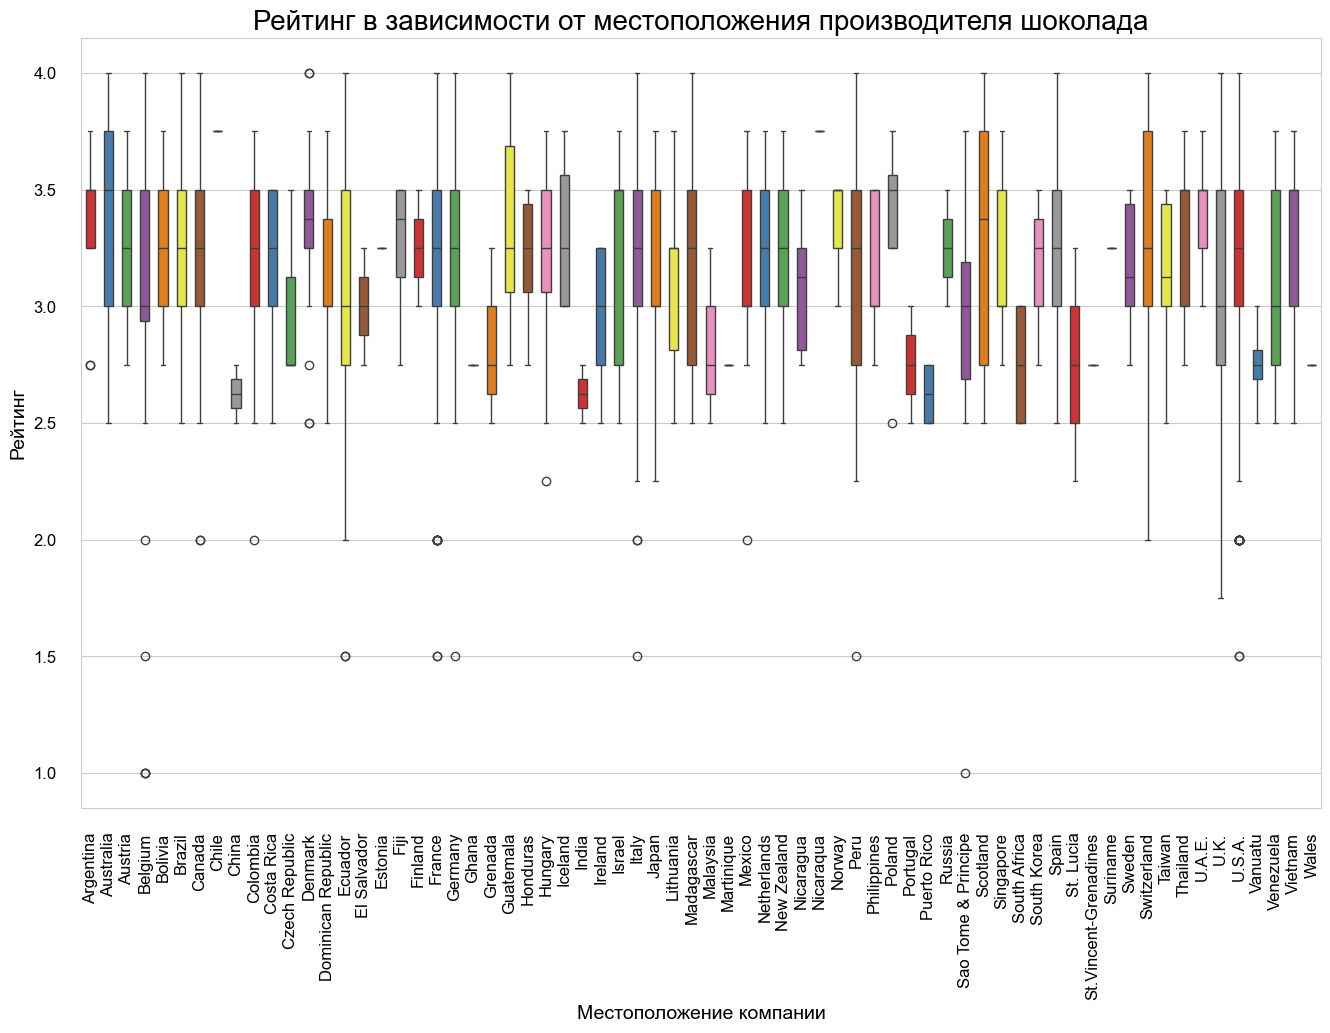

In [39]:
# Определение зависимости рейтинга от страны производителя шоколада
fig = plt.figure()
fig.set_size_inches(16, 10)
    
sns.boxplot(y='Rating', x=df['Company Location'].astype('category'), data=df, palette='Set1', width=.5)
plt.title('Рейтинг в зависимости от местоположения производителя шоколада', fontsize=20)
plt.xticks(rotation=90)
plt.xlabel('Местоположение компании')
plt.ylabel('Рейтинг')
fig.savefig('Rating_vs_Company_Location.png')

plt.show()

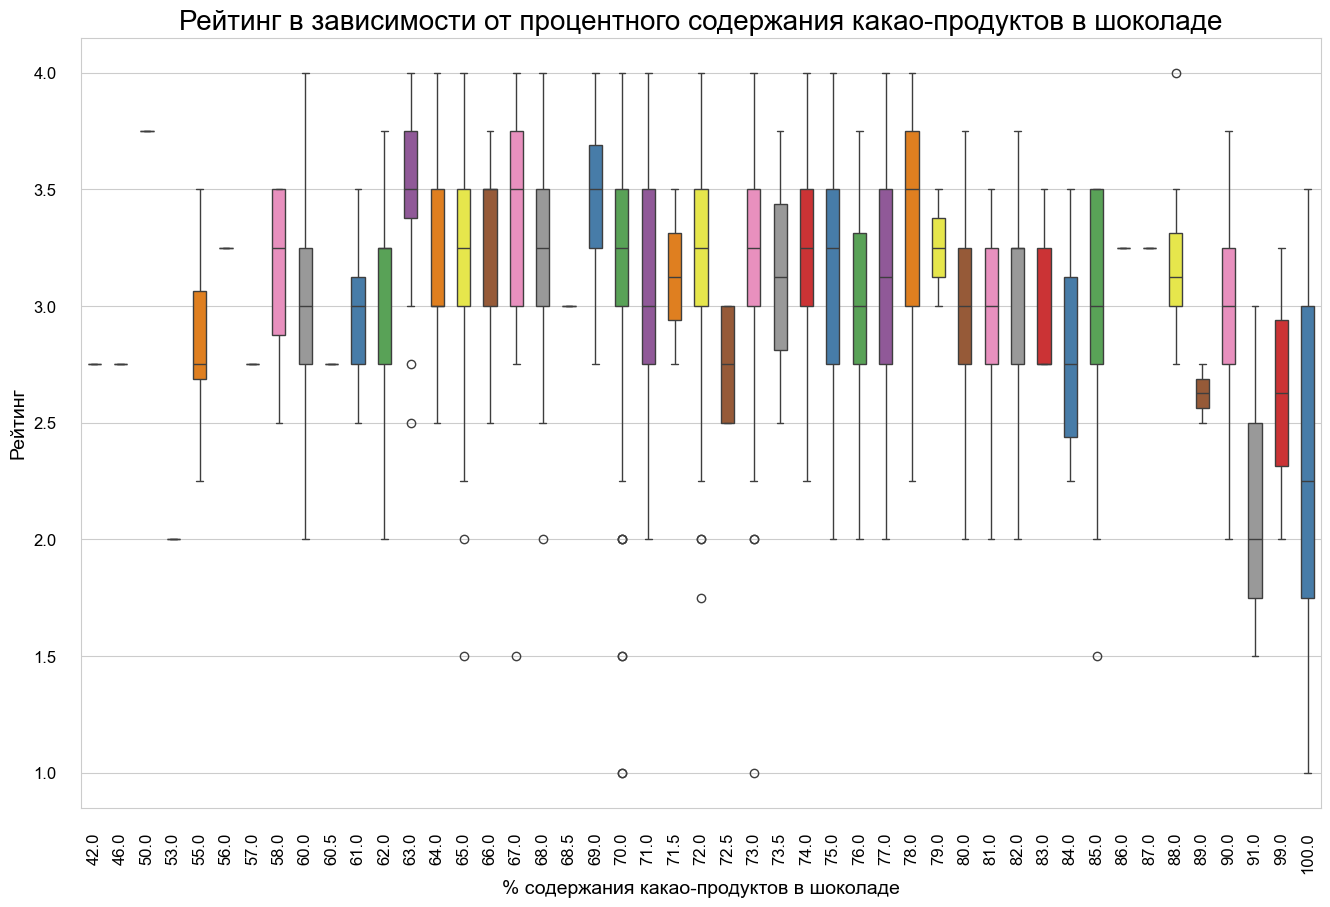

In [40]:
# Определение зависимости рейтинга от процентного содержания шоколада
fig = plt.figure()
fig.set_size_inches(16, 10)
sns.boxplot(y='Rating', x=df['Cocoa Percent'].astype('category'), data=df, palette='Set1', width=.5)
plt.title('Рейтинг в зависимости от процентного содержания какао-продуктов в шоколаде', fontsize=20)
plt.xticks(rotation=90)
plt.xlabel('% содержания какао-продуктов в шоколаде')
plt.ylabel('Рейтинг')
fig.savefig('Rating_vs_Cocoa_Percent.png')

plt.show()

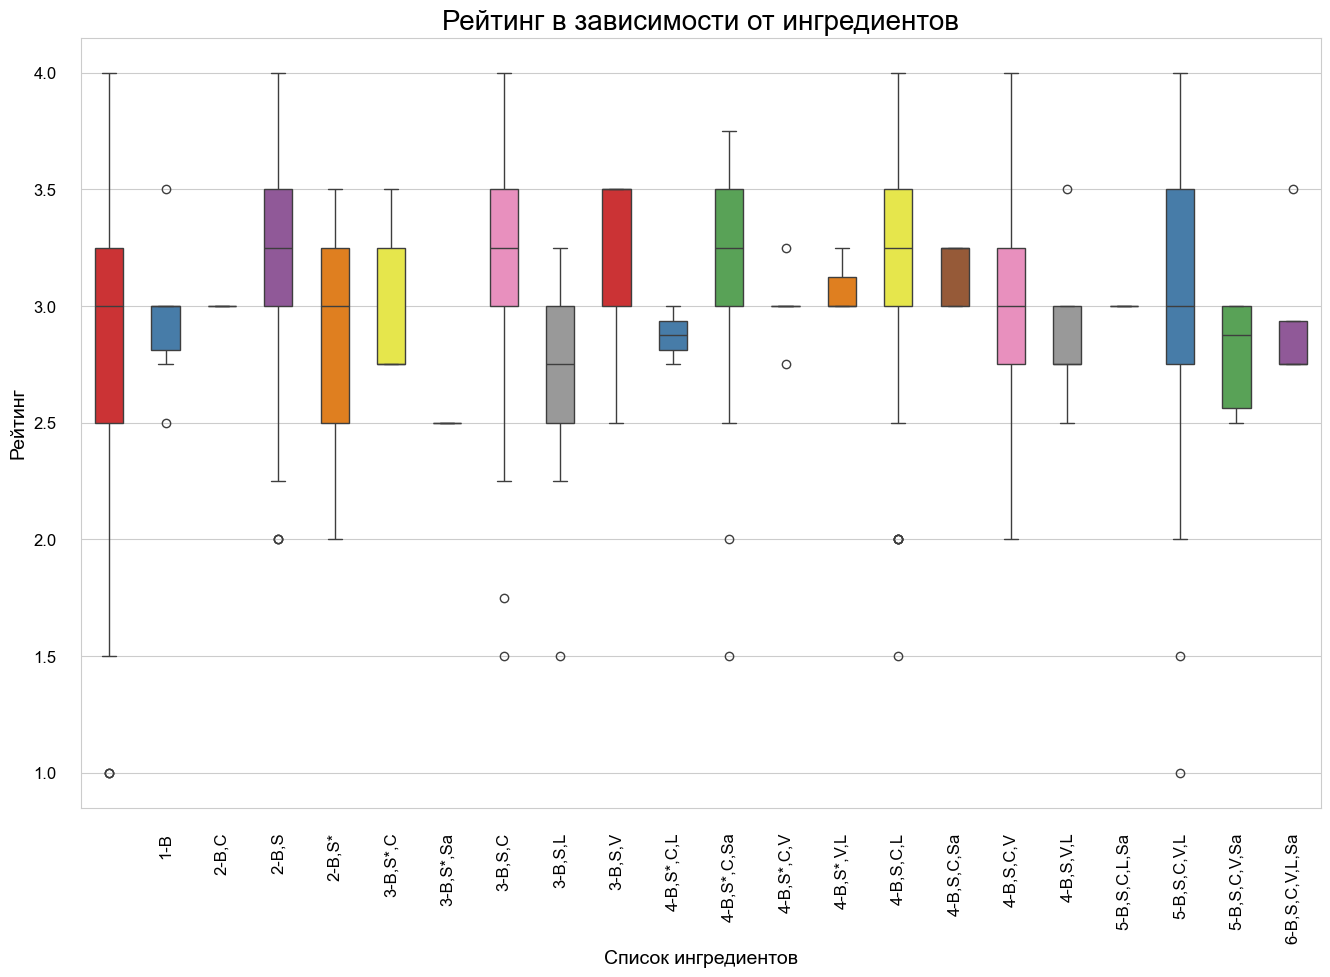

In [43]:
# Определение зависимости рейтинга от состава шоколада
fig = plt.figure()
fig.set_size_inches(16, 10)
sns.boxplot(y='Rating', x=df['Ingredients'].astype('category'), data=df, palette='Set1', width=.5)
plt.title('Рейтинг в зависимости от ингредиентов', fontsize=20)
plt.xticks(rotation=90)
plt.xlabel('Список ингредиентов')
plt.ylabel('Рейтинг')
fig.savefig('Ingredients.png')

plt.show()

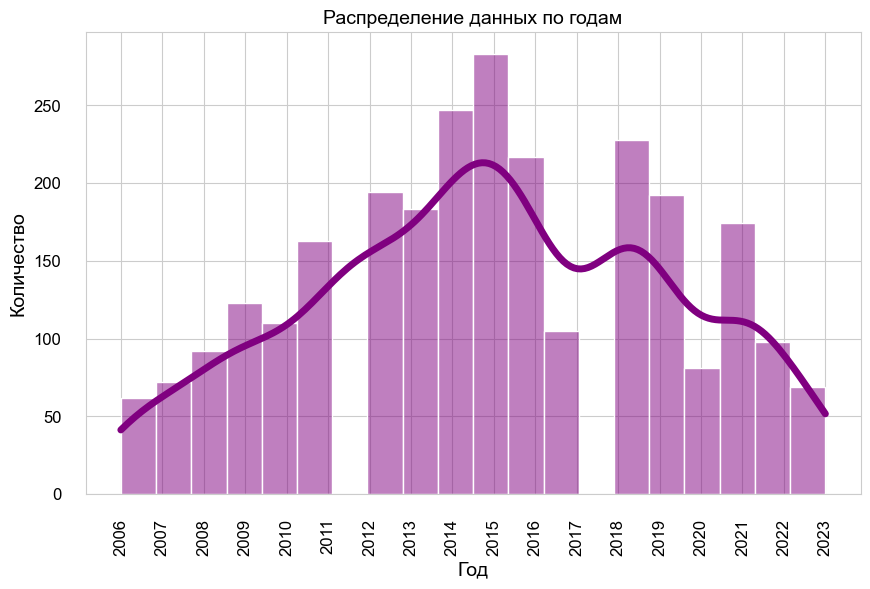

In [48]:
# Распределение данных по годам
fig = plt.figure(figsize=(10, 6))
sns.histplot(df['Review Date'], kde=True, color='purple')
plt.title('Распределение данных по годам')
plt.xlabel('Год')
plt.ylabel('Количество')
plt.xticks(range(2006, 2024, 1), rotation=90)
fig.savefig('Distribution_by_Date.png')
plt.show()

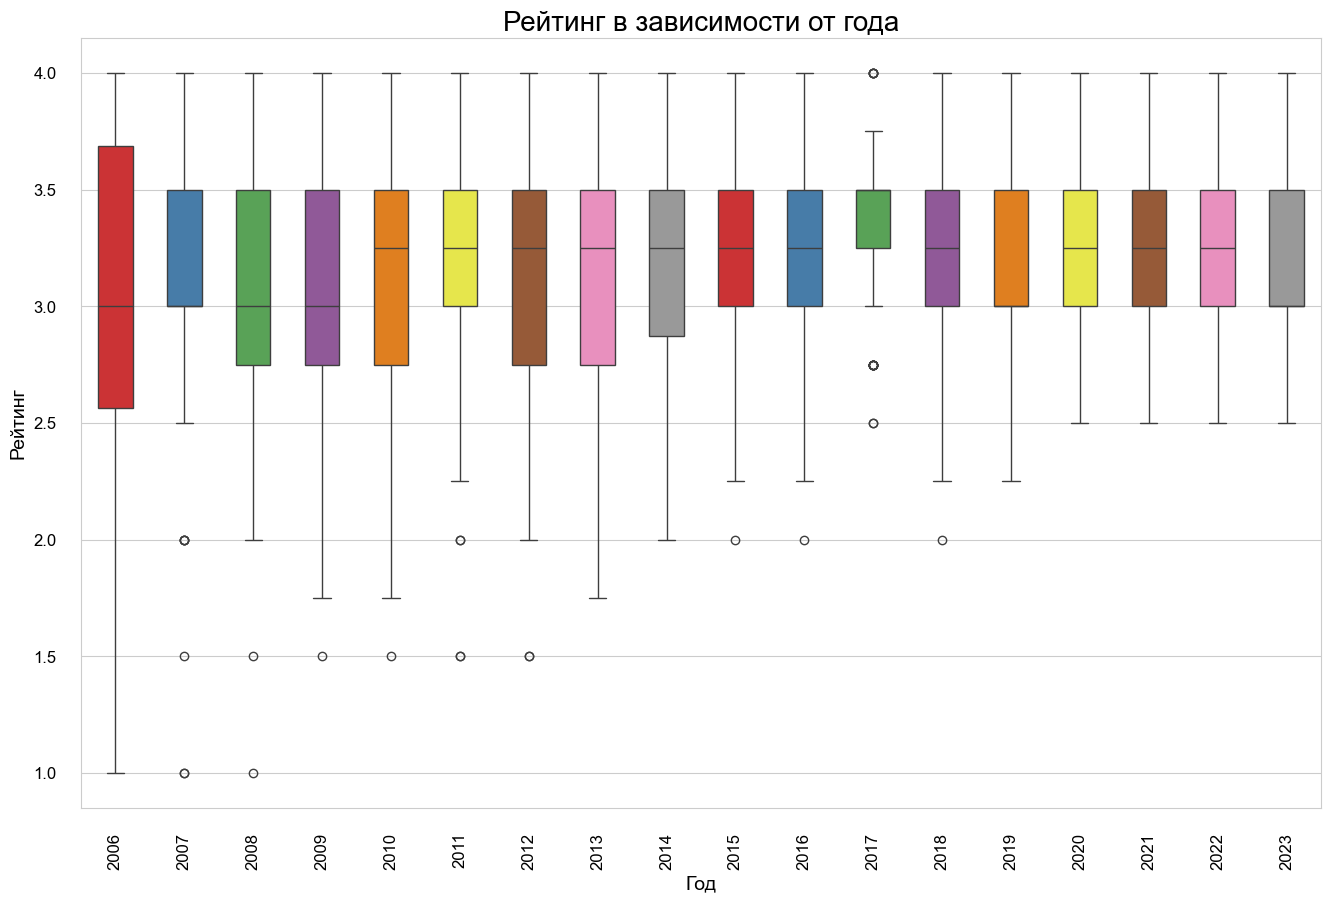

In [49]:
# Рейтинг по годам
fig = plt.figure()
fig.set_size_inches(16, 10)
    
sns.boxplot(y='Rating', x=df['Review Date'].astype('category'), data=df, palette='Set1', width=.5)
plt.title('Рейтинг в зависимости от года', fontsize=20)
plt.xticks(rotation=90)
plt.xlabel('Год')
plt.ylabel('Рейтинг')
fig.savefig('Rating_vs_Review_Date.png')

plt.show()

In [16]:
# Выборка данных с высоким рейтингом (более 4)
df_high_rating = df[df['Rating'] >= 4]
df_high_rating.shape

(116, 10)

In [17]:
# Выборка данных с низким рейтингом (менее 2)
df_low_rating = df[df['Rating'] <= 2.0]
df_low_rating.shape

(50, 10)

In [88]:
# Функция для подсчета количества уникальных слов
def most_common_words_generate(data):
    most_common_words = {}

    for sentence in data:
        for word in sentence.split(','):
            word = word.strip().lower()
            most_common_words[word] = most_common_words.get(word, 0) + 1
    return most_common_words

In [89]:
# Подсчет и вывод самых популярных (топ 10) характеристик шоколада для всей выборки и для выборки с самым высоким рейтингом
most_common_words_all = most_common_words_generate(df['Most Memorable Characteristics'])
most_common_words_high_rating = most_common_words_generate(df_high_rating['Most Memorable Characteristics'])
print(sorted(most_common_words_high_rating.items(), key=lambda x: x[1], reverse=True)[:10])
print(sorted(most_common_words_all.items(), key=lambda x: x[1], reverse=True)[:10])   

[('creamy', 37), ('cocoa', 24), ('nutty', 17), ('complex', 10), ('banana', 7), ('spicy', 6), ('floral', 6), ('tart', 5), ('balanced', 5), ('sticky', 5)]
[('sweet', 289), ('cocoa', 272), ('nutty', 271), ('roasty', 227), ('earthy', 202), ('creamy', 197), ('fatty', 177), ('sandy', 174), ('floral', 153), ('intense', 144)]


In [90]:
# создание облака слов 
from wordcloud import WordCloud

def wordCloudFunction(datas,numWords):
    text = ' '.join(data for data in datas)
    wordcloud = WordCloud(background_color='white',
                          width=1000,height=400, scale=1, max_words=numWords
                         ).generate(text)
    plt.clf()
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    

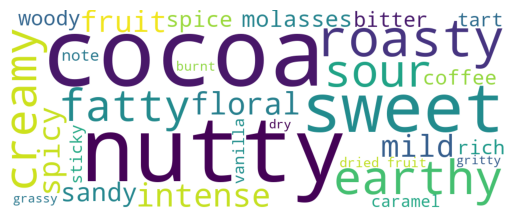

In [25]:
# Облако слов (30) характеристик шоколада для всей выборки
wordCloudFunction(df['Most Memorable Characteristics'],30)

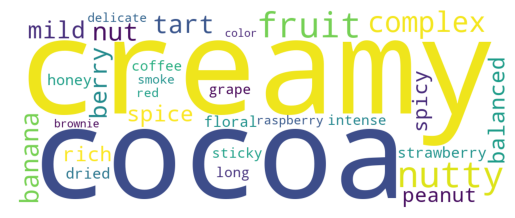

In [22]:
# Облако слов (30) характеристик шоколада для выборки шоколада с высоким рейтингом
wordCloudFunction(df_high_rating['Most Memorable Characteristics'],30)

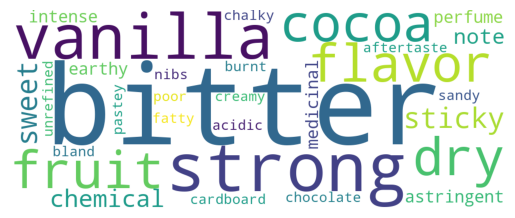

In [23]:
# Облако слов (30) характеристик шоколада для выборки шоколада с низким рейтингом
wordCloudFunction(df_low_rating['Most Memorable Characteristics'],30)

In [24]:
# Описательная статистика для выборки с высоким рейтингом (категориальные признаки)
df_high_rating.describe(include='object').T

,count,unique,top,freq
Company (Manufacturer),116,54,Soma,15
Company Location,116,17,U.S.A.,45
Country of Bean Origin,116,26,Venezuela,20
Specific Bean Origin or Bar Name,116,107,Chuao,3
Ingredients,116,6,"3-B,S,C",61
Most Memorable Characteristics,116,116,"light color, fruit, yogurt",1


In [25]:
# Описательная статистика для выборки с высоким рейтингом (числовые признаки)
df_high_rating.describe()

,REF,Review Date,Cocoa Percent,Rating
count,116.000000,116.000000,116.000000,116.0
mean,1335.836207,2013.905172,70.750000,4.0
std,805.965399,4.309703,3.364456,0.0
min,48.000000,2006.000000,60.000000,4.0
25%,736.000000,2011.000000,70.000000,4.0
50%,1177.000000,2013.000000,70.000000,4.0
75%,2025.000000,2017.000000,72.000000,4.0
max,2852.000000,2023.000000,88.000000,4.0


In [26]:
# Описательная статистика для выборки с низким рейтингом (категориальные признаки)
df_low_rating.describe(include='object').T

,count,unique,top,freq
Company (Manufacturer),50,40,Michel Cluizel,3
Company Location,50,13,U.S.A.,17
Country of Bean Origin,50,16,Blend,19
Specific Bean Origin or Bar Name,50,46,Venezuela,2
Ingredients,50,9,unknown,14
Most Memorable Characteristics,50,50,"very nutty, very bitter",1


In [72]:
# Описательная статистика для выборки с низким рейтингом (числовые признаки)
df_low_rating.describe()

,REF,Review Date,Cocoa Percent,Rating
count,50.000000,50.000000,50.000000,50.000000
mean,447.820000,2008.940000,79.200000,1.805000
std,469.031424,2.937512,13.237239,0.312536
min,5.000000,2006.000000,53.000000,1.000000
25%,112.500000,2006.250000,70.000000,1.500000
50%,290.000000,2008.000000,75.000000,2.000000
75%,691.750000,2011.000000,90.750000,2.000000
max,2154.000000,2018.000000,100.000000,2.000000


In [28]:
# Вывод уникальных значений компаний-производителей и их количества
df['Company (Manufacturer)'].value_counts()

Company (Manufacturer)
Soma                     57
Fresco                   40
Bonnat                   33
Arete                    32
A. Morin                 29
                         ..
Nikoa                     1
Nina                      1
Nugali                    1
Oakland Chocolate Co.     1
Ki' Xocolatl              1
Name: count, Length: 616, dtype: int64

In [29]:
# Расчет среднего рейтинга для стран произростания какао-бобов
df_by_cocoa_origin = df.groupby('Country of Bean Origin', group_keys=False)[['Rating']].mean()
df_by_cocoa_origin.sort_values(by='Rating', ascending=False, inplace=True)
df_by_cocoa_origin

,Rating
Country of Bean Origin,
Tobago,3.625000
Sao Tome & Principe,3.500000
Solomon Islands,3.450000
Congo,3.318182
Thailand,3.300000
...,...
Sierra Leone,2.750000
France (Reunion),2.750000
Martinique,2.750000


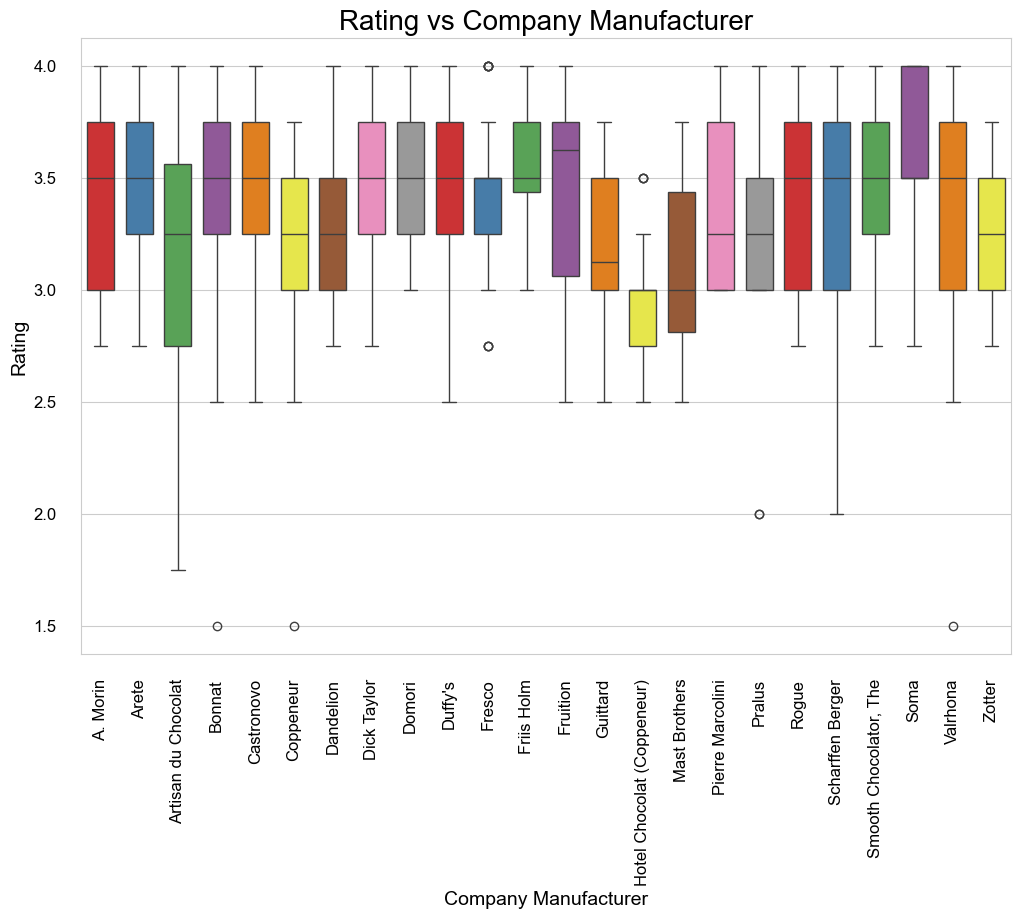

In [30]:
# Выборка данных, включающая только данные по компанием, для которых более 15 значений в таблице
filtered_manufacturers = df['Company (Manufacturer)'].value_counts()[df['Company (Manufacturer)'].value_counts() > 15].index

filtered_df = df[df['Company (Manufacturer)'].isin(filtered_manufacturers)]

# Создание боксплота рейтинга от страны производителя для этих компаний
plt.figure(figsize=(12, 8))
sns.boxplot(x='Company (Manufacturer)', y='Rating', data=filtered_df, palette='Set1', width=.7)
plt.title('Rating vs Company Manufacturer', fontsize=20)
plt.xticks(rotation=90)
plt.xlabel('Company Manufacturer')
plt.ylabel('Rating')
fig.savefig('Rating_vs_Company_Manufacturer.png')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Tobago Estate (Pralus)'),
  Text(1, 0, 'Heirloom Cacao Preservation (Zokoko)'),
  Text(2, 0, 'Ocelot'),
  Text(3, 0, 'Matale'),
  Text(4, 0, 'Patric'),
  Text(5, 0, 'Idilio (Felchlin)'),
  Text(6, 0, 'Nikoa'),
  Text(7, 0, 'Cuna de Piedra'),
  Text(8, 0, "Chocola'te"),
  Text(9, 0, 'Landmark (Amano)')])

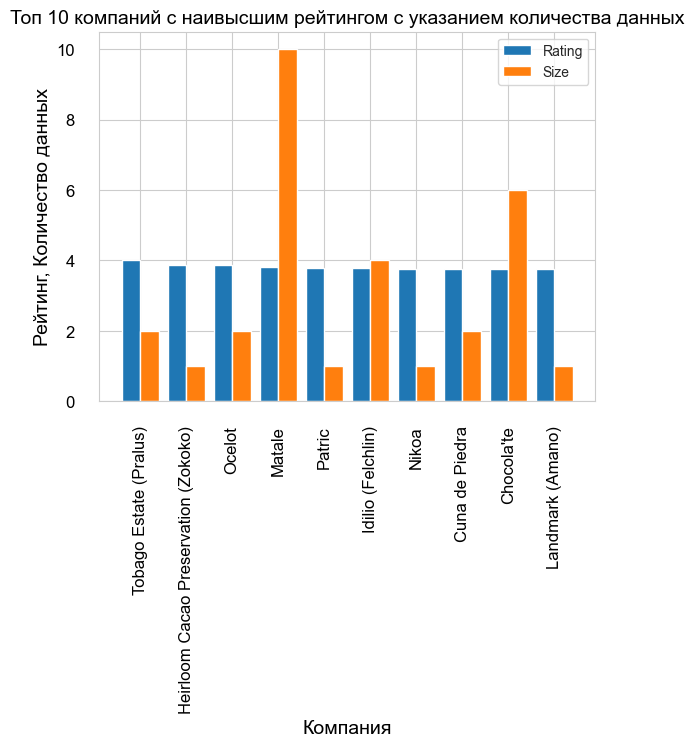

In [31]:
# Топ 10 производителей шоколада по рейтингу среди всех компаний

top_10_companies_by_rating = df.groupby('Company (Manufacturer)')['Rating'].mean().sort_values(ascending=False)[:10]
top_10_companies_by_rating_count = df[df['Company (Manufacturer)'].isin(top_10_companies_by_rating.index)].groupby('Company (Manufacturer)')['Rating'].size()
X_axis = np.arange(len(top_10_companies_by_rating)) 
plt.bar(X_axis - 0.2, top_10_companies_by_rating, 0.4, label = 'Rating')
plt.bar(X_axis + 0.2, top_10_companies_by_rating_count, 0.4, label = 'Size')
plt.xticks(X_axis, top_10_companies_by_rating.index) 
plt.xlabel("Компания") 
plt.ylabel("Рейтинг, Количество данных") 
plt.title("Топ 10 компаний с наивысшим рейтингом с указанием количества данных") 
plt.legend() 
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Soma'),
  Text(1, 0, 'Friis Holm'),
  Text(2, 0, 'Arete'),
  Text(3, 0, 'Smooth Chocolator, The'),
  Text(4, 0, 'Domori'),
  Text(5, 0, 'Dick Taylor'),
  Text(6, 0, 'Castronovo'),
  Text(7, 0, "Duffy's"),
  Text(8, 0, 'Bonnat'),
  Text(9, 0, 'Fruition')])

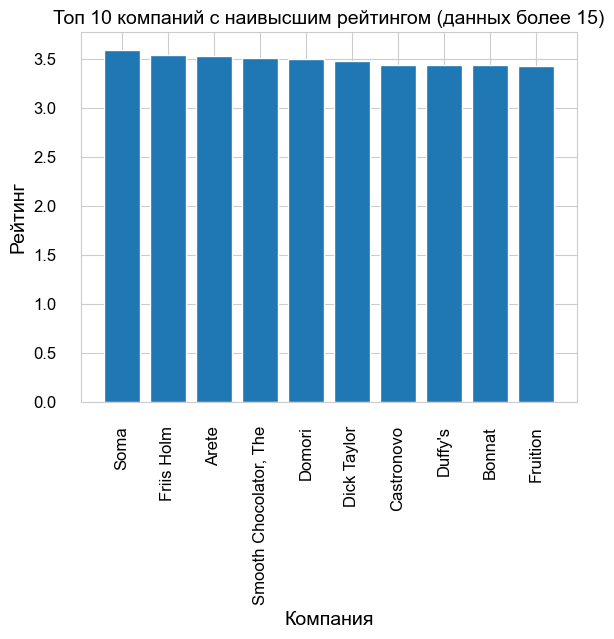

In [32]:
# Топ 10 производителей шоколада по рейтингу среди тех компаний, данных по которым более 15
top_10_companies_by_rating_more_15 = filtered_df.groupby('Company (Manufacturer)')['Rating'].mean().sort_values(ascending=False)[:10]
plt.bar(top_10_companies_by_rating_more_15.index, top_10_companies_by_rating_more_15)
plt.xlabel("Компания") 
plt.ylabel("Рейтинг") 
plt.title("Топ 10 компаний с наивысшим рейтингом (данных более 15)") 
plt.xticks(rotation=90)

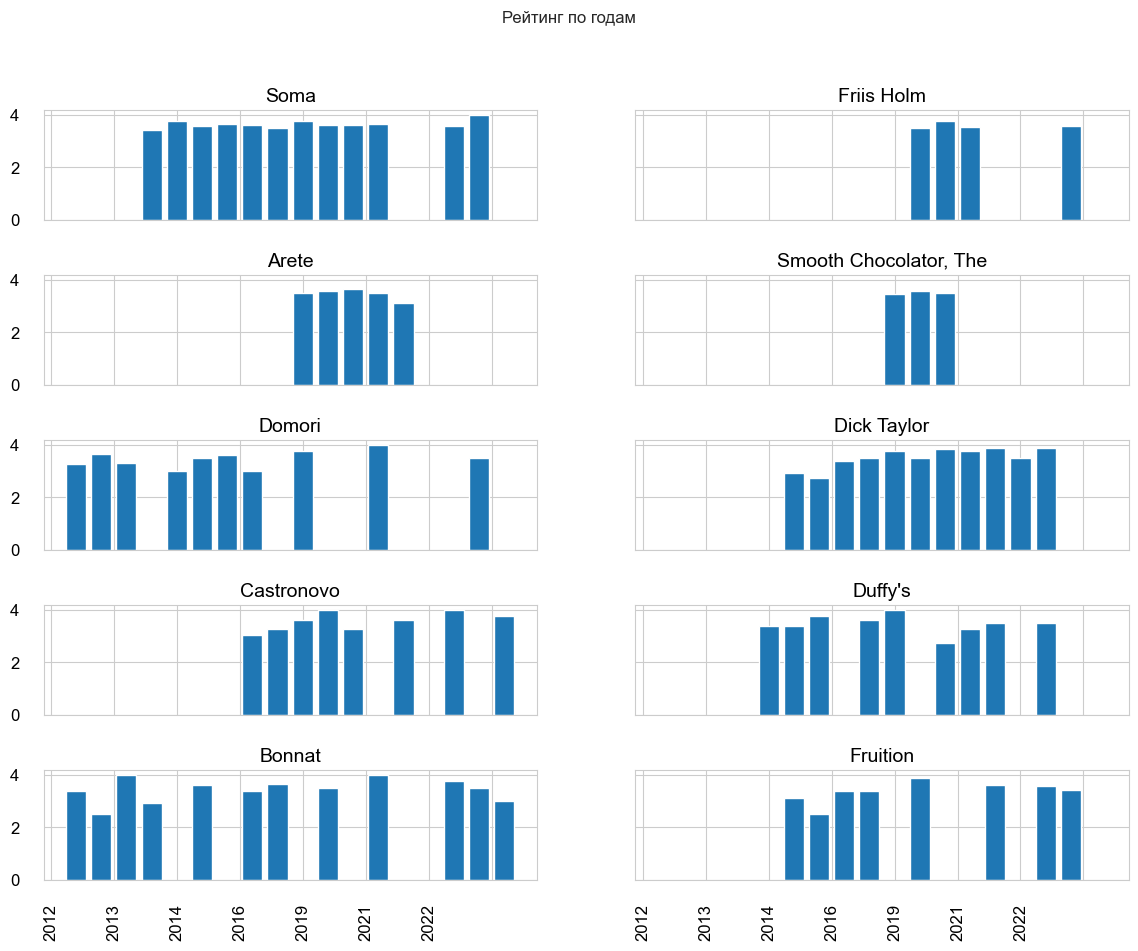

In [33]:
# Рейтинг по годам для топ 10 производителей шоколада по рейтингу среди тех компаний, данных по которым более 15
fig, axs = plt.subplots(5, 2, sharex=True, sharey=True)
fig.suptitle('Рейтинг по годам')
fig.set_size_inches(14, 10)
fig.subplots_adjust(hspace=0.5)

i = 0
j = 0
for company in top_10_companies_by_rating_more_15.index:
    df_company = filtered_df[filtered_df['Company (Manufacturer)'] == company].groupby('Review Date')['Rating'].mean()
    axs[i, j].bar(df_company.index, df_company)
    axs[i, j].set_title(company)
    axs[i, j].set_xticklabels(df_company.index, rotation=90)   
    i = i + 1 if j == 1 else i
    j = j + 1 if j == 0 else 0
    

In [37]:
# Статистика для топ 10 производителей шоколада по рейтингу среди тех компаний, данных по которым более 15
cocoa_mean = top_10_companies_by_rating_more_15_cocoa.mean() 
cocoa_std = top_10_companies_by_rating_more_15_cocoa.std()
cocoa_min = top_10_companies_by_rating_more_15_cocoa.min()
cocoa_max = top_10_companies_by_rating_more_15_cocoa.max()
print(f'min: {cocoa_min:.3}, max: {cocoa_max:.3}', f'mean: {cocoa_mean:.3}, std: {cocoa_std:.3}')

min: 6.65e+03, max: 7.81e+03 mean: 7.17e+03, std: 2.84e+02


In [38]:
# список числовых признаков
numeric_columns = df.loc[:,df.dtypes!=object].columns
numeric_columns

Index(['REF', 'Review Date', 'Cocoa Percent', 'Rating'], dtype='object')

In [39]:
# список категориальных признаков
categorical_columns = df.loc[:,df.dtypes==object].columns
categorical_columns

Index(['Company (Manufacturer)', 'Company Location', 'Country of Bean Origin',
       'Specific Bean Origin or Bar Name', 'Ingredients',
       'Most Memorable Characteristics'],
      dtype='object')

In [40]:
# подсчет корреляции для числовых признаков
df[numeric_columns].corr()

,REF,Review Date,Cocoa Percent,Rating
REF,1.000000,0.993219,0.001502,0.106136
Review Date,0.993219,1.000000,0.000523,0.106492
Cocoa Percent,0.001502,0.000523,1.000000,-0.139617
Rating,0.106136,0.106492,-0.139617,1.000000


In [41]:
# Описательная статистика для категориальных данных
df[categorical_columns].describe().T

,count,unique,top,freq
Company (Manufacturer),2693,616,Soma,57
Company Location,2693,68,U.S.A.,1227
Country of Bean Origin,2693,64,Peru,265
Specific Bean Origin or Bar Name,2693,1720,Madagascar,56
Ingredients,2693,22,"3-B,S,C",1100
Most Memorable Characteristics,2693,2650,"creamy, nutty, cocoa",4


In [42]:
# Средний рейтинг по годам для всех стран произростания какао-бобов
average_rating_by_country_origin_pivot = pd.pivot_table(df, values='Rating', index=['Review Date'], columns=['Country of Bean Origin'], aggfunc=np.mean)
average_rating_by_country_origin_pivot

Country of Bean Origin,Australia,Bali,Belize,Blend,Bolivia,Brazil,Burma,Cameroon,China,Colombia,...,Tanzania,Thailand,Tobago,Togo,Trinidad,U.S.A.,Uganda,Vanuatu,Venezuela,Vietnam
Review Date,,,,,,,,,,,,,,,,,,,,,
2006,NaN,NaN,NaN,2.583333,4.000000,3.000000,NaN,NaN,NaN,2.937500,...,NaN,NaN,NaN,NaN,2.500000,3.000000,NaN,3.000000,3.295455,NaN
2007,NaN,NaN,NaN,2.883333,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.500000,NaN,NaN,NaN,3.354167,NaN
2008,NaN,NaN,NaN,3.055556,2.916667,3.500000,NaN,NaN,NaN,3.000000,...,2.250000,NaN,NaN,NaN,3.375000,NaN,2.500000,NaN,3.178571,NaN
2009,NaN,NaN,NaN,3.050000,3.125000,2.900000,NaN,NaN,NaN,2.875000,...,2.500000,NaN,NaN,NaN,NaN,3.125000,NaN,3.750000,3.138889,3.750000
2010,NaN,NaN,2.750000,3.175000,NaN,3.250000,NaN,NaN,NaN,3.500000,...,NaN,NaN,NaN,NaN,3.083333,3.500000,NaN,NaN,3.035714,3.250000
2011,3.25,NaN,3.250000,3.031250,3.500000,3.500000,NaN,NaN,NaN,3.000000,...,3.500000,NaN,NaN,NaN,2.500000,2.250000,NaN,NaN,3.416667,3.000000
2012,NaN,NaN,NaN,3.131579,3.055556,3.166667,NaN,NaN,NaN,3.166667,...,3.375000,NaN,4.00,NaN,3.500000,3.291667,NaN,3.250000,3.180556,3.428571
2013,NaN,NaN,3.208333,3.583333,3.142857,3.281250,3.0,NaN,NaN,2.750000,...,NaN,NaN,3.25,NaN,3.375000,3.250000,NaN,3.500000,3.287500,3.500000
2014,NaN,NaN,3.187500,3.140625,2.968750,3.500000,NaN,NaN,NaN,3.250000,...,NaN,NaN,NaN,NaN,3.291667,3.392857,3.000000,3.083333,3.250000,3.062500


In [43]:
# Создание копии данных для подготки данных к построению  ML модели
df_pred = df.copy()

In [44]:
# Подготовка данных по составу для использования в ML модели
list_of_ingredients_from_df = set([ing for ing in df['Ingredients'].values.tolist()])

In [45]:
# Создание списка всех ингредиентов
list_of_ingredients = []
for element in list_of_ingredients_from_df:
    ingredients = element.split('-')[-1]
    for ing in ingredients.split(','):
        if ing.strip() not in list_of_ingredients:
            list_of_ingredients.append(ing.strip())
list_of_ingredients

['B', 'S*', 'C', 'V', 'S', 'Sa', 'unknown', 'L']

In [46]:
# описательная статситика данных, для которых состав не известен
unknown_ingredients = df_pred[df_pred['Ingredients'] == 'unknown']
unknown_ingredients.describe()

,REF,Review Date,Cocoa Percent,Rating
count,87.000000,87.000000,87.000000,87.000000
mean,819.908046,2011.241379,75.655172,2.810345
std,531.408673,2.840592,12.476795,0.681958
min,48.000000,2006.000000,55.000000,1.000000
25%,404.000000,2009.000000,70.000000,2.500000
50%,701.000000,2011.000000,70.000000,3.000000
75%,1058.000000,2013.000000,80.000000,3.250000
max,2084.000000,2018.000000,100.000000,4.000000


In [47]:
# создание списка состава для % содержания какао-продукции
ingredients_based_on_cocoa = df_pred.groupby('Cocoa Percent')['Ingredients'].agg(pd.Series.mode).apply(lambda x: x if type(x) == str else x[0])
ingredients_based_on_cocoa

Cocoa Percent
42.0        4-B,S,V,L
46.0      5-B,S,C,V,L
50.0        4-B,S,C,L
53.0      5-B,S,C,V,L
55.0      5-B,S,C,V,L
56.0        4-B,S,C,L
57.0          3-B,S,C
58.0        4-B,S,C,L
60.0          3-B,S,C
60.5      5-B,S,C,V,L
61.0      5-B,S,C,V,L
62.0          3-B,S,C
63.0          3-B,S,C
64.0      5-B,S,C,V,L
65.0          3-B,S,C
66.0          3-B,S,C
67.0          3-B,S,C
68.0          3-B,S,C
68.5          3-B,S,C
69.0            2-B,S
70.0          3-B,S,C
71.0        4-B,S,C,L
71.5         3-B,S*,C
72.0          3-B,S,C
72.5     5-B,S,C,V,Sa
73.0            2-B,S
73.5            2-B,S
74.0          3-B,S,C
75.0          3-B,S,C
76.0            2-B,S
77.0          3-B,S,C
78.0            2-B,S
79.0          3-B,S,C
80.0          3-B,S,C
81.0            2-B,S
82.0          3-B,S,C
83.0          3-B,S,C
84.0          3-B,S,C
85.0          3-B,S,C
86.0        4-B,S,C,V
87.0          3-B,S,C
88.0          3-B,S,C
89.0          3-B,S,C
90.0          3-B,S,C
91.0            2-

In [48]:
# Для всех пропущенных данных по составу - заполнения состава на основе данных по % содержанию какао
df_pred['Ingredients'] = df_pred['Ingredients'].apply(lambda x: None if x == 'unknown' else x )
df_pred['Ingredients'] = np.where(df_pred['Ingredients'].isnull(), df_pred['Cocoa Percent'].apply(lambda x: ingredients_based_on_cocoa[x]), df_pred['Ingredients'])
df_pred['Ingredients'].value_counts()

Ingredients
3-B,S,C           1168
2-B,S              768
4-B,S,C,L          296
5-B,S,C,V,L        188
4-B,S,C,V          142
2-B,S*              31
4-B,S*,C,Sa         20
unknown             14
3-B,S*,C            13
3-B,S,L              9
4-B,S*,C,V           7
1-B                  6
5-B,S,C,V,Sa         6
4-B,S,V,L            5
4-B,S,C,Sa           5
6-B,S,C,V,L,Sa       4
3-B,S,V              3
4-B,S*,V,L           3
4-B,S*,C,L           2
3-B,S*,Sa            1
2-B,C                1
5-B,S,C,L,Sa         1
Name: count, dtype: int64

In [49]:
# Заполнение оставшихся пустых значений данными по составу с одним ингредиентом
df_pred['Ingredients'] = np.where(df_pred['Ingredients'] == 'unknown', '1-B', df_pred['Ingredients'])
df_pred['Ingredients'].value_counts()

Ingredients
3-B,S,C           1168
2-B,S              768
4-B,S,C,L          296
5-B,S,C,V,L        188
4-B,S,C,V          142
2-B,S*              31
1-B                 20
4-B,S*,C,Sa         20
3-B,S*,C            13
3-B,S,L              9
4-B,S*,C,V           7
5-B,S,C,V,Sa         6
4-B,S,V,L            5
4-B,S,C,Sa           5
6-B,S,C,V,L,Sa       4
3-B,S,V              3
4-B,S*,V,L           3
4-B,S*,C,L           2
3-B,S*,Sa            1
2-B,C                1
5-B,S,C,L,Sa         1
Name: count, dtype: int64

In [50]:
# Удаление категориальных признаков, которые имеют очень много уникальных значений
df_pred.drop(columns=['REF', 'Company Location', 'Company (Manufacturer)', 'Specific Bean Origin or Bar Name', 'Most Memorable Characteristics'], inplace=True)
df_pred.head()

,Review Date,Country of Bean Origin,Cocoa Percent,Ingredients,Rating
0,2021,India,68.0,"3-B,S,C",3.50
1,2021,Uganda,80.0,"3-B,S,C",3.25
2,2021,Fiji,68.0,"3-B,S,C",3.00
3,2021,Venezuela,72.0,"3-B,S,C",3.00
4,2019,Madagascar,76.0,"3-B,S,C",3.75


In [51]:
# Замена данных по стране-произрастания какао на среднее значение рейтинга по этой стране
rating_by_bean_origin = df_pred.groupby('Country of Bean Origin')['Rating'].mean()
df_pred['country_of_bean'] = df_pred['Country of Bean Origin'].apply(lambda x: rating_by_bean_origin[x])
df_pred.drop(columns='Country of Bean Origin', inplace=True)
df_pred.head()

,Review Date,Cocoa Percent,Ingredients,Rating,country_of_bean
0,2021,68.0,"3-B,S,C",3.50,3.208333
1,2021,80.0,"3-B,S,C",3.25,3.150000
2,2021,68.0,"3-B,S,C",3.00,3.062500
3,2021,72.0,"3-B,S,C",3.00,3.227011
4,2019,76.0,"3-B,S,C",3.75,3.260526


In [52]:
# Создание нового столбца, содержаго список ингредиентов
df_pred['Ingredients_'] = df_pred['Ingredients'].apply(lambda x: ''.join(x).split('-')[-1].strip().split(','))
df_pred

,Review Date,Cocoa Percent,Ingredients,Rating,country_of_bean,Ingredients_
0,2021,68.0,"3-B,S,C",3.50,3.208333,"[B, S, C]"
1,2021,80.0,"3-B,S,C",3.25,3.150000,"[B, S, C]"
2,2021,68.0,"3-B,S,C",3.00,3.062500,"[B, S, C]"
3,2021,72.0,"3-B,S,C",3.00,3.227011,"[B, S, C]"
4,2019,76.0,"3-B,S,C",3.75,3.260526,"[B, S, C]"
...,...,...,...,...,...,...
2688,2011,70.0,"4-B,S*,C,Sa",3.75,3.200943,"[B, S*, C, Sa]"
2689,2011,65.0,"4-B,S*,C,Sa",3.50,3.208333,"[B, S*, C, Sa]"
2690,2011,62.0,"4-B,S*,C,Sa",3.25,3.208333,"[B, S*, C, Sa]"
2691,2011,65.0,"4-B,S*,C,Sa",3.00,3.318182,"[B, S*, C, Sa]"


In [53]:
# Создание уникальных столбцов для всех ингредиентов, с целью перевода категориального столца в числовые
df_pred['Beans'] = df_pred['Ingredients_'].apply(lambda x: 1 if 'B' in x else 0)
df_pred['Cocoa Butter'] = df_pred['Ingredients_'].apply(lambda x: 1 if 'C' in x else 0)
df_pred['Vanilla'] = df_pred['Ingredients'].apply(lambda x: 1 if 'V' in x else 0)
df_pred['Lecithin'] = df_pred['Ingredients'].apply(lambda x: 1 if 'L' in x else 0)
df_pred['Salt'] = df_pred['Ingredients'].apply(lambda x: 1 if 'Sa' in x else 0)
df_pred['Sugar'] = df_pred['Ingredients'].apply(lambda x: 1 if 'S' in x and 'S*' not in x else 0)
df_pred['Sweetener'] = df_pred['Ingredients'].apply(lambda x: 1 if 'S*' in x else 0)
df_pred.sample(10)

,Review Date,Cocoa Percent,Ingredients,Rating,country_of_bean,Ingredients_,Beans,Cocoa Butter,Vanilla,Lecithin,Salt,Sugar,Sweetener
646,2008,88.0,"3-B,S,C",2.75,3.170759,"[B, S, C]",1,1,0,0,0,1,0
2281,2013,70.0,"3-B,S,C",3.50,3.038217,"[B, S, C]",1,1,0,0,0,1,0
460,2013,100.0,1-B,3.50,3.170759,[B],1,0,0,0,0,0,0
1470,2012,72.0,"5-B,S,C,V,L",3.00,3.038217,"[B, S, C, V, L]",1,1,1,1,0,1,0
2241,2015,70.0,"4-B,S,C,V",2.75,3.136905,"[B, S, C, V]",1,1,1,0,0,1,0
1982,2007,72.0,"5-B,S,C,V,L",3.75,3.170759,"[B, S, C, V, L]",1,1,1,1,0,1,0
327,2011,75.0,"3-B,S,C",4.00,3.260526,"[B, S, C]",1,1,0,0,0,1,0
1454,2018,70.0,"2-B,S",3.00,3.158730,"[B, S]",1,0,0,0,0,1,0
524,2014,70.0,"3-B,S,C",2.75,3.200943,"[B, S, C]",1,1,0,0,0,1,0
184,2023,73.0,"4-B,S,C,L",3.00,3.261682,"[B, S, C, L]",1,1,0,1,0,1,0


In [54]:
# Удаление первоначального и промежуточного столцов, содержащие информацию по ингредиентам
df_pred = df_pred.drop(columns=['Ingredients_', 'Ingredients'])
df_pred.describe()

,Review Date,Cocoa Percent,Rating,country_of_bean,Beans,Cocoa Butter,Vanilla,Lecithin,Salt,Sugar,Sweetener
count,2693.000000,2693.000000,2693.000000,2693.000000,2693.0,2693.000000,2693.000000,2693.000000,2693.000000,2693.000000,2693.000000
mean,2014.871147,71.596361,3.197828,3.197828,1.0,0.688080,0.132937,0.188637,0.013739,0.963609,0.028593
std,4.304197,5.512978,0.440790,0.079783,0.0,0.463363,0.339570,0.391293,0.116428,0.187295,0.166690
min,2006.000000,42.000000,1.000000,2.500000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,70.000000,3.000000,3.170759,1.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,2015.000000,70.000000,3.250000,3.221591,1.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,2018.000000,74.000000,3.500000,3.250000,1.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,2023.000000,100.000000,4.000000,3.625000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [55]:
# Удаление столца - какао-бобы, так как он есть во всех строках
df_pred = df_pred.drop(columns=['Beans'])

In [56]:
# Создание списка числовых признаков
numeric_columns = df_pred.loc[:,df_pred.dtypes!=object].columns
numeric_columns

Index(['Review Date', 'Cocoa Percent', 'Rating', 'country_of_bean',
       'Cocoa Butter', 'Vanilla', 'Lecithin', 'Salt', 'Sugar', 'Sweetener'],
      dtype='object')

In [57]:
# Подсчет корреляция для всех числовых признаков
corrs = df_pred[numeric_columns].corr()
corrs

,Review Date,Cocoa Percent,Rating,country_of_bean,Cocoa Butter,Vanilla,Lecithin,Salt,Sugar,Sweetener
Review Date,1.000000,0.000523,0.106492,0.130156,-0.144206,-0.371546,-0.265235,-0.062439,0.032888,-0.004700
Cocoa Percent,0.000523,1.000000,-0.139617,0.008096,-0.125067,-0.118463,-0.145071,-0.026660,-0.220913,0.007106
Rating,0.106492,-0.139617,1.000000,0.181000,0.024872,-0.147225,-0.054913,-0.045743,0.153601,-0.075749
country_of_bean,0.130156,0.008096,0.181000,1.000000,-0.049550,-0.115450,-0.115797,-0.006588,0.046739,-0.019171
Cocoa Butter,-0.144206,-0.125067,0.024872,-0.049550,1.000000,0.237663,0.289815,0.072582,0.104576,-0.052818
Vanilla,-0.371546,-0.118463,-0.147225,-0.115450,0.237663,1.000000,0.370343,0.047743,0.017685,-0.001550
Lecithin,-0.265235,-0.145071,-0.054913,-0.115797,0.289815,0.370343,1.000000,-0.016141,0.068359,-0.054248
Salt,-0.062439,-0.026660,-0.045743,-0.006588,0.072582,0.047743,-0.016141,1.000000,-0.334796,0.381705
Sugar,0.032888,-0.220913,0.153601,0.046739,0.104576,0.017685,0.068359,-0.334796,1.000000,-0.882840
Sweetener,-0.004700,0.007106,-0.075749,-0.019171,-0.052818,-0.001550,-0.054248,0.381705,-0.882840,1.000000


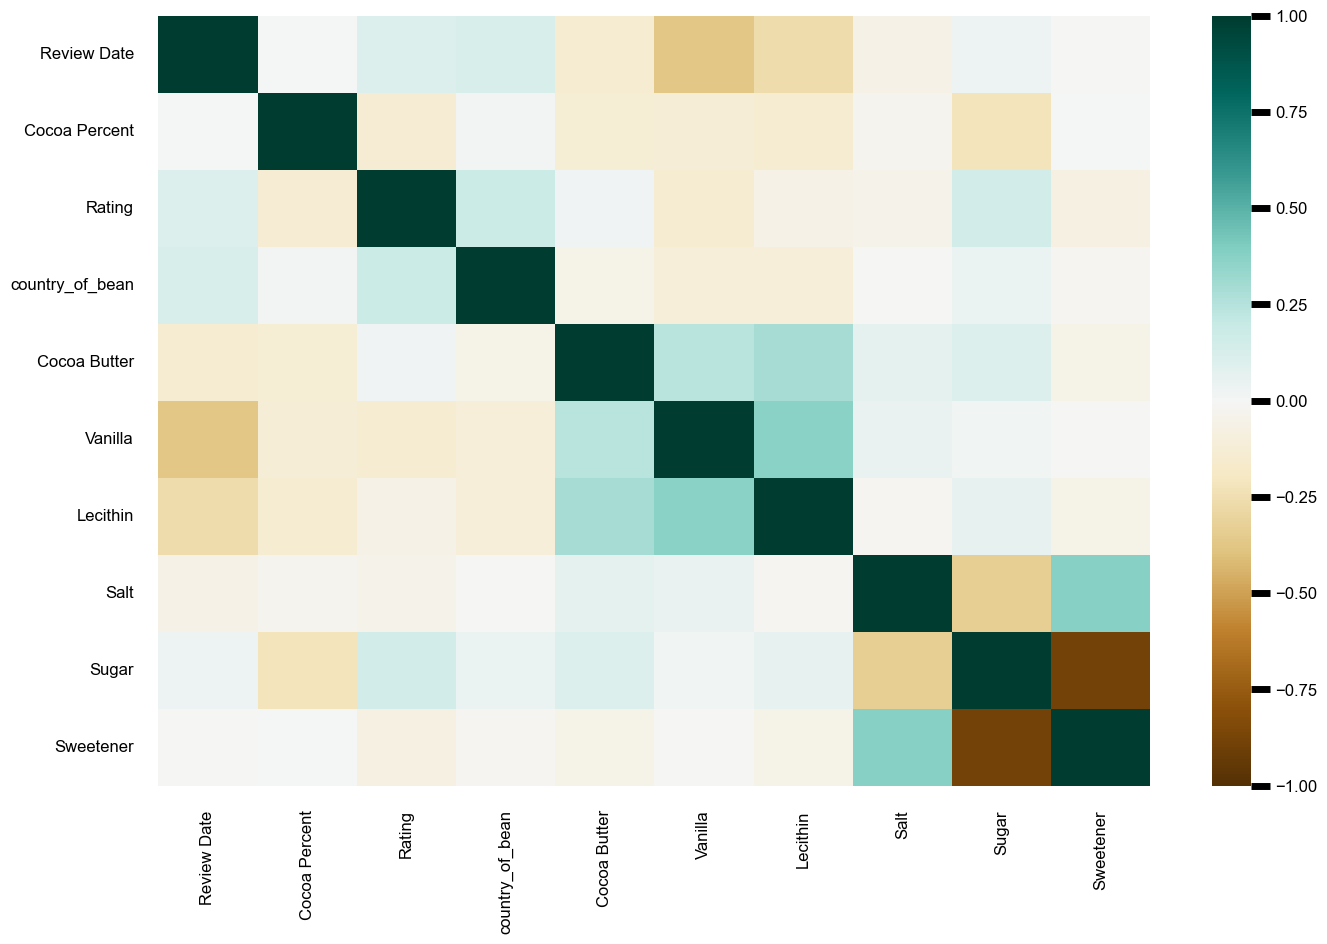

In [58]:
# Построение тепловой карты для матрицы корреляций
import seaborn as sns

fig = plt.figure()

fig.set_size_inches(16, 10)

sns.heatmap(corrs, 
            xticklabels=corrs.columns,
            yticklabels=corrs.index,
            cmap='BrBG',
            vmin=-1,
            vmax=1)

fig.savefig('corrs.png')
plt.show()

In [59]:
# Удаление одного из коррелируемых признаков
df_pred = df_pred.drop(columns=['Sweetener'])

In [60]:
df_pred.head()

,Review Date,Cocoa Percent,Rating,country_of_bean,Cocoa Butter,Vanilla,Lecithin,Salt,Sugar
0,2021,68.0,3.50,3.208333,1,0,0,0,1
1,2021,80.0,3.25,3.150000,1,0,0,0,1
2,2021,68.0,3.00,3.062500,1,0,0,0,1
3,2021,72.0,3.00,3.227011,1,0,0,0,1
4,2019,76.0,3.75,3.260526,1,0,0,0,1


In [107]:
numeric_columns = df_pred.loc[:,df_pred.dtypes!=object].columns

In [63]:
# Разбиение данных на обучающую и тестовую
from sklearn.model_selection import train_test_split

x = df_pred.drop(columns=['Rating'], axis=1)
y = df_pred['Rating']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [62]:
# Размер обучающей и тестовой выборки
X_train.shape, X_test.shape

((2154, 8), (539, 8))

In [65]:
# Создание модели линейной регрессии
from sklearn.linear_model import LinearRegression


lr =LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [66]:
# Подсчте таргета для обучающей и тестовой выборки
y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)

In [74]:
# Расчет ошибки на обучающей и тестовой выборках
from sklearn.metrics import mean_squared_error

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred).round(3)
lr_test_mse = mean_squared_error(y_test, y_lr_test_pred).round(3)

In [75]:
# Кросс-валидация для модели линейной регрессии
from sklearn.model_selection import cross_validate

model = LinearRegression()

cv_result = cross_validate(model, X_train, y_train, 
                           scoring='neg_mean_squared_error',
                           cv=5, return_train_score=True)

cv_train_mse = -np.mean(cv_result['train_score']).round(3) 
cv_test_mse = -np.mean(cv_result['test_score']).round(3) 

In [77]:
# Вывод результатов ошибок моделей линейной регрессии
lr_results = pd.DataFrame(['Linear regression',lr_train_mse, cv_train_mse, lr_test_mse, cv_test_mse]).transpose()
lr_results.columns = ['Method','Training MSE','CV Training MSE','Test MSE', 'CV Testing MSE']
lr_results

,Method,Training MSE,CV Training MSE,Test MSE,CV Testing MSE
0,Linear regression,0.178,0.178,0.172,0.181


In [80]:
# Построение дерева решений для регрессии
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [81]:
# Расчет прогноза для обучающей и тестовой выборки
y_tree_train_pred = tree.predict(X_train)
y_tree_test_pred = tree.predict(X_test)

In [83]:
# Расчет ошибки на обучающей и тестовой выборках
tree_train_mse = mean_squared_error(y_train, y_tree_train_pred).round(3)
tree_test_mse = mean_squared_error(y_test, y_tree_test_pred).round(3)

In [84]:
# Вывод результатов ошибок моделей дерева решений
tree_results = pd.DataFrame(['DecisionTree',tree_train_mse, tree_test_mse]).transpose()
tree_results.columns = ['Method','Training MSE','Test MSE']
tree_results

,Method,Training MSE,Test MSE
0,DecisionTree,0.031,0.308
